In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv('creditcard.csv')
# Display the first five rows of the dataset
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# Print the shape of the data
print(df.shape)

(284807, 31)


In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
# Determine number of fraud cases in dataset
# The classes are heavily skewed
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


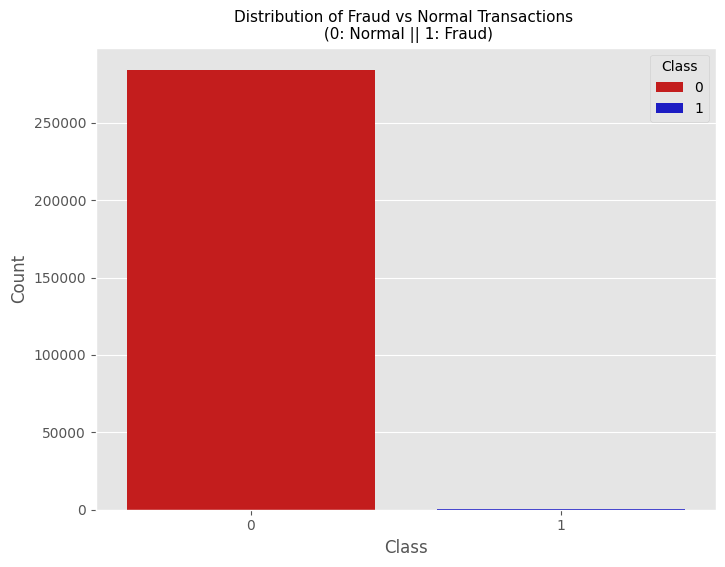

In [6]:
plt.style.use('ggplot')
plt.figure(figsize=(8, 6))
colors = [ "#DF0101", "#0101DF"]
sns.countplot(x='Class', data = df, palette=colors, hue='Class')
plt.title('Distribution of Fraud vs Normal Transactions \n (0: Normal || 1: Fraud)', fontsize=11)
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

<ipython-input-7-ee2f29a5411d>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(amount)


<Axes: ylabel='Density'>

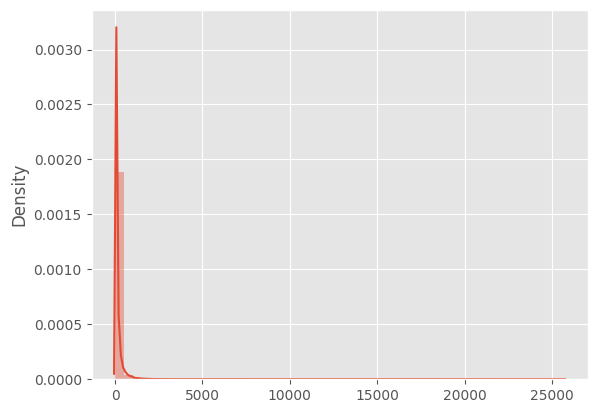

In [7]:
# distribution of Amount
amount = [df['Amount'].values]
sns.distplot(amount)

<ipython-input-8-51b5443e99e4>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(time)


<Axes: ylabel='Density'>

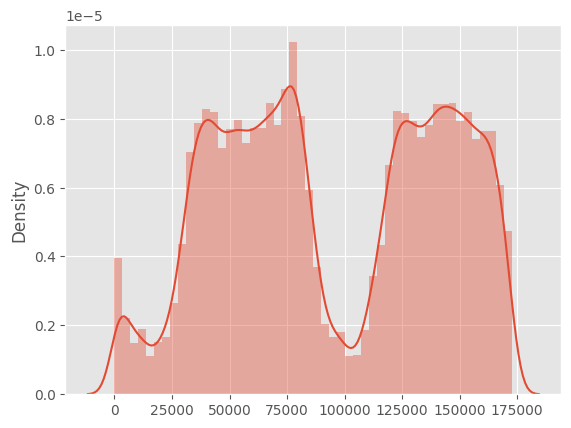

In [8]:
# distribution of Time
time = df['Time'].values
sns.distplot(time)

## Trying Random Forest For Original Imbalanced Data

In [9]:
#seperating the X and the Y from the dataset
X=df.drop(['Class'], axis=1)
Y=df["Class"]
print(X.shape)
print(Y.shape)
#getting just the values for the sake of processing (its a numpy array with no columns)
X_data=X.values
Y_data=Y.values

(284807, 30)
(284807,)


In [10]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size = 0.2, random_state = 42)

In [11]:
# Random forest model creation with n_estimators set to 100
rfc = RandomForestClassifier(n_estimators=50, max_depth=10, max_features='sqrt', n_jobs=-1, random_state=42)
rfc.fit(X_train, Y_train)
# Predictions
y_pred = rfc.predict(X_test)

In [12]:
# n_outliers = len(Fraud)
n_errors = (y_pred != Y_test).sum()
print("The model used is Random Forest classifier")
acc= accuracy_score(Y_test,y_pred)
print("The accuracy is  {}".format(acc))
prec= precision_score(Y_test,y_pred)
print("The precision is {}".format(prec))
rec= recall_score(Y_test,y_pred)
print("The recall is {}".format(rec))
f1= f1_score(Y_test,y_pred)
print("The F1-Score is {}".format(f1))
MCC=matthews_corrcoef(Y_test,y_pred)
print("The Matthews correlation coefficient is {}".format(MCC))

The model used is Random Forest classifier
The accuracy is  0.9995435553526912
The precision is 0.9736842105263158
The recall is 0.7551020408163265
The F1-Score is 0.8505747126436781
The Matthews correlation coefficient is 0.8572503300661733


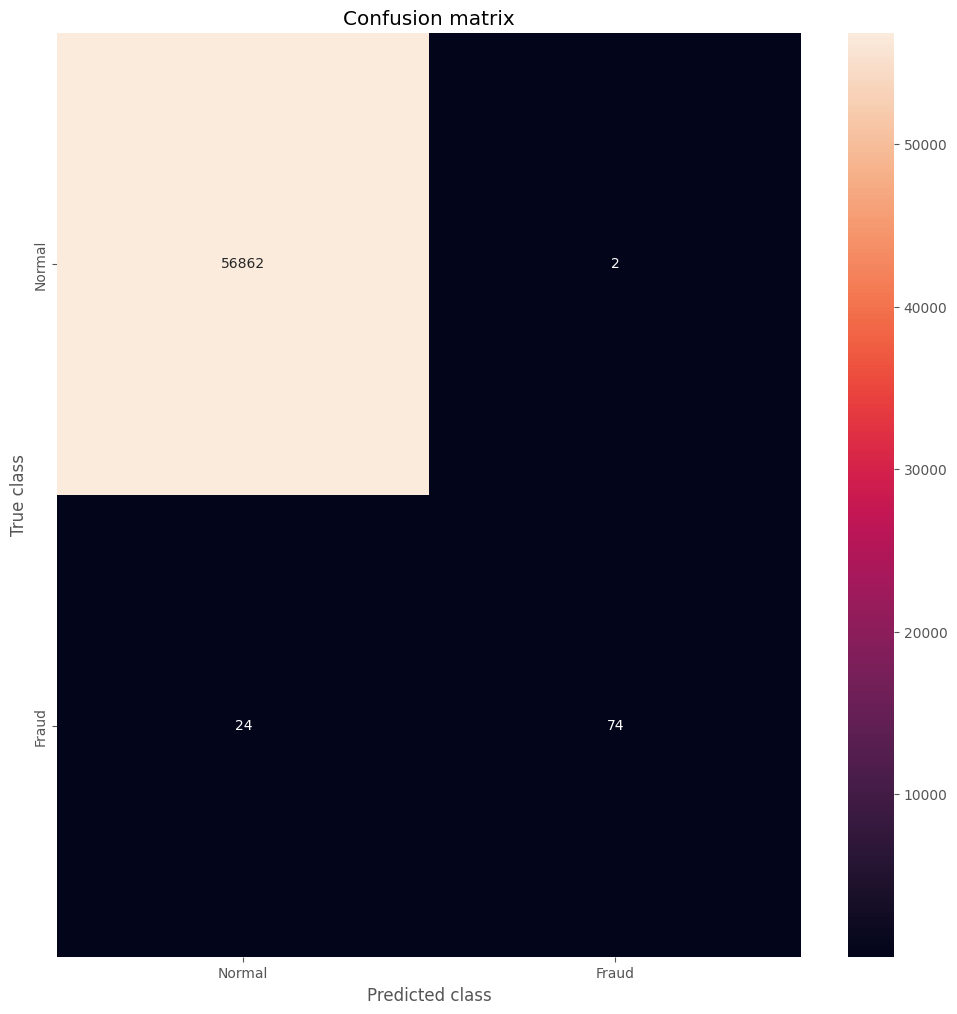

In [13]:
#printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [14]:
# Run classification metrics
print("accuracy_score",accuracy_score(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

accuracy_score 0.9995435553526912
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.76      0.85        98

    accuracy                           1.00     56962
   macro avg       0.99      0.88      0.93     56962
weighted avg       1.00      1.00      1.00     56962



It is the case of Overfitting

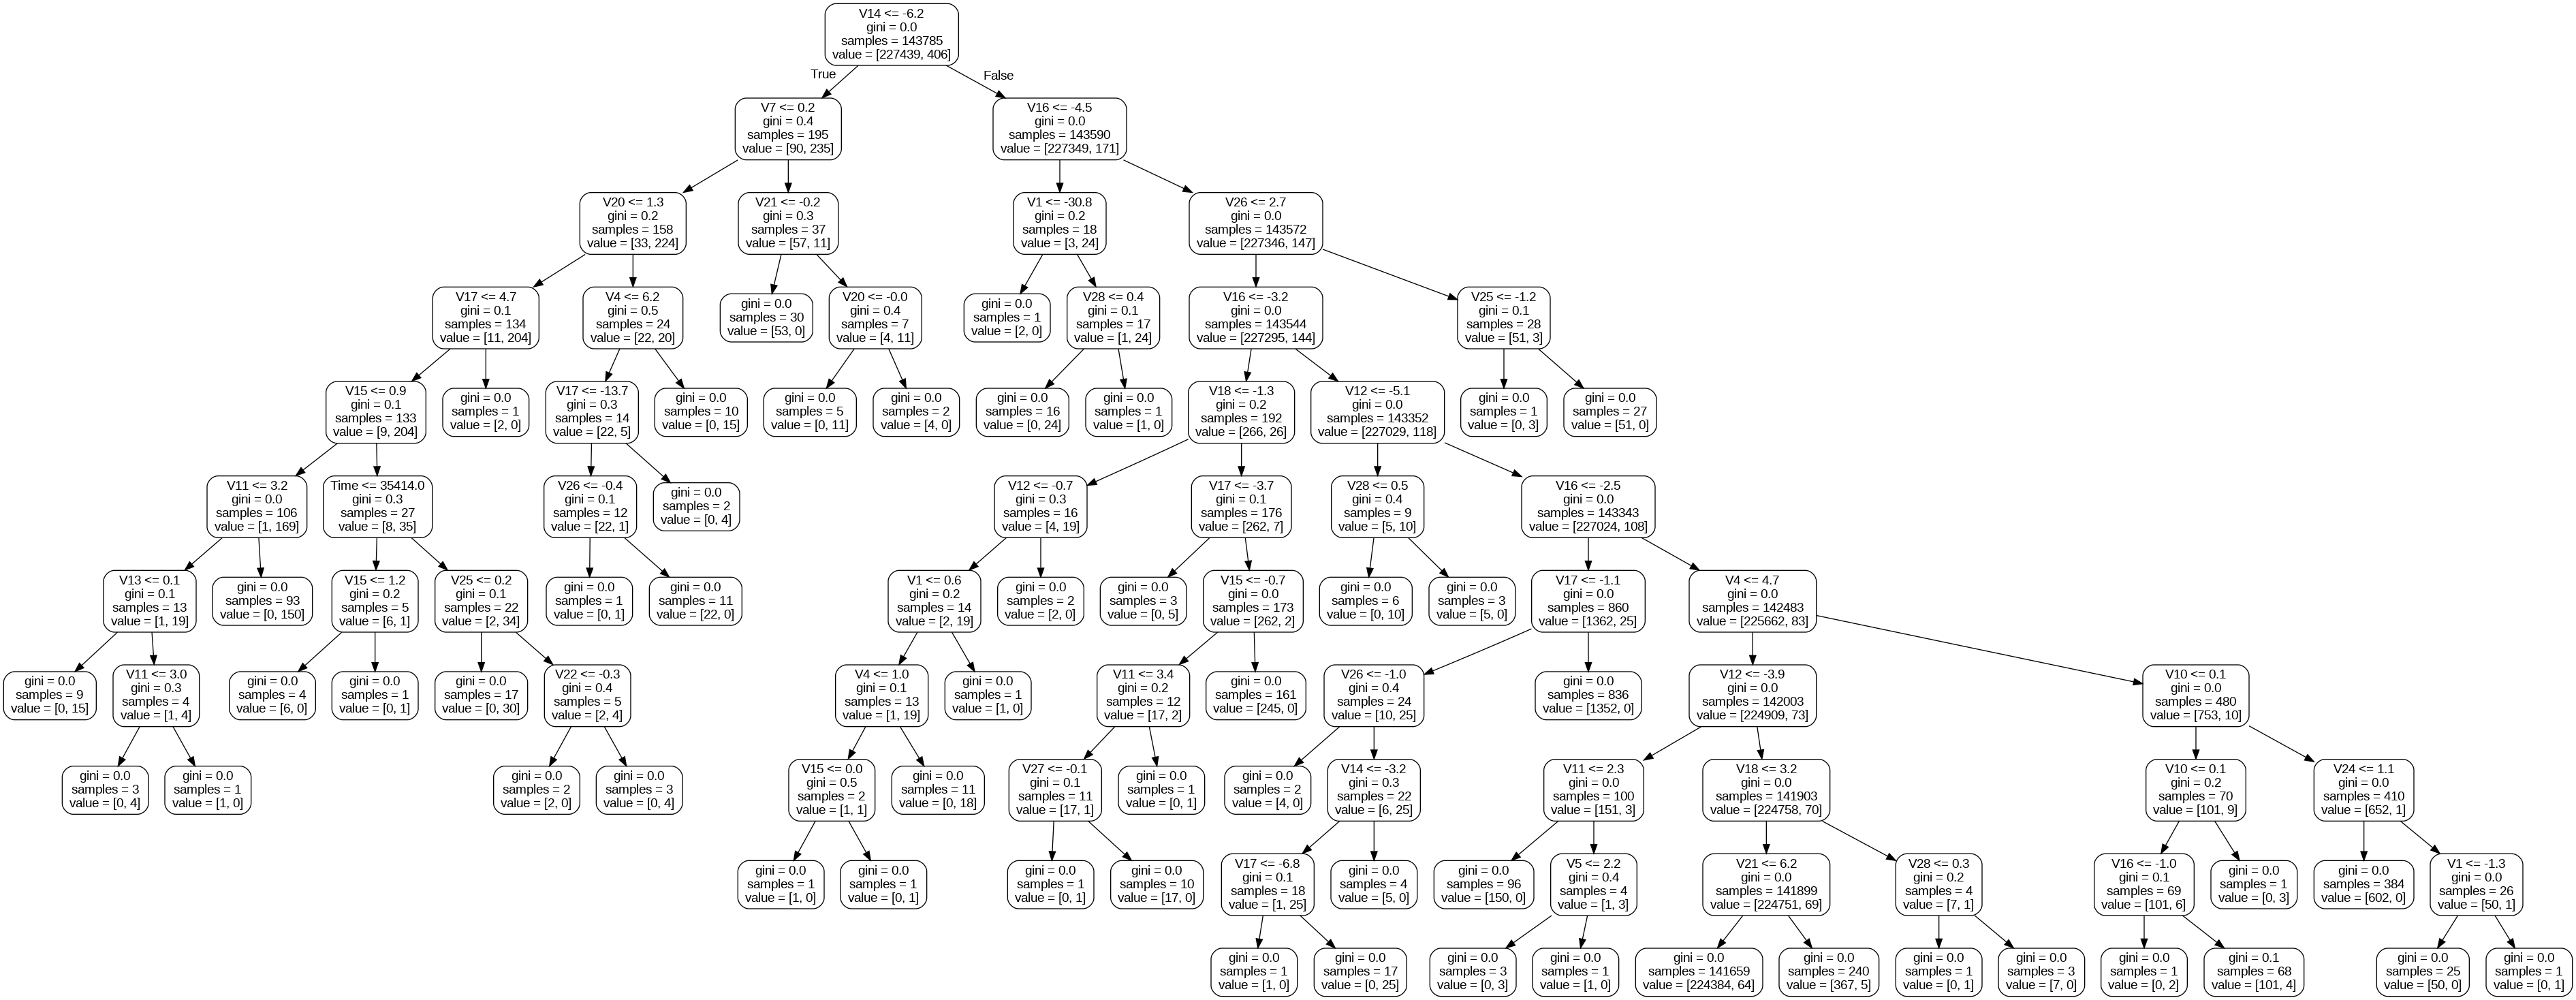

In [15]:
# Import tools needed for visualization
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydot

#visualizing the random tree
feature_list = list(X.columns)

#pulling out one tree from the forest
tree = rfc.estimators_[5]
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
display(Image(graph.create_png()))

## HANDLING IMBALANCED DATA

## Scaling and Distributing
In this phase of our kernel, we will first scale the columns comprise of Time and Amount . Time and amount should be scaled as the other columns. On the other hand, we need to also create a sub sample of the dataframe in order to have an equal amount of Fraud and Non-Fraud cases, helping our algorithms better understand patterns that determines whether a transaction is a fraud or not.

There are 492 cases of fraud in our dataset so we can randomly get 492 cases of non-fraud to create our new sub dataframe.
We concat the 492 cases of fraud and non fraud, creating a new sub-sample.

### Scaling Time and Amount

In [16]:
# Since most of our data has already been scaled we should scale the columns that are left to scale (Amount and Time)
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

In [17]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

# Amount and Time are Scaled!

df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


### Under Sampling

In [18]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.

# Lets shuffle the data before creating the subsamples

df = df.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1]
legit_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, legit_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
99688,0.569971,-0.205066,1.186024,-0.240503,0.026796,0.211937,-0.176505,-0.022554,-0.027707,-0.048724,...,-0.389775,-0.650459,-1.521300,0.143794,-0.378647,0.239424,-0.719596,0.037001,0.024009,0
153823,-0.275554,0.182462,-19.641857,14.706335,-22.801238,12.114672,-14.898113,0.840778,-28.011293,-11.919639,...,3.834649,-8.228874,3.318178,2.585212,0.195009,-1.194803,0.038423,-4.126746,-0.645329,1
110242,0.670579,-0.152199,-0.854799,-0.522940,2.057287,-1.855938,-0.342618,0.152929,-0.394201,0.320055,...,0.295234,0.588381,1.376418,-0.117239,-0.281184,0.055060,-0.170182,0.082914,0.103788,0
226877,-0.307413,0.706622,-6.423306,1.658515,-5.866440,2.052064,-0.615817,-3.372266,-5.036556,2.643106,...,-0.713516,0.641211,-0.256678,-2.337233,-0.158278,1.198797,-0.261258,0.780125,-0.731801,1
42936,0.526514,-0.509722,-12.980943,6.720508,-13.455636,8.698610,-11.479552,-2.681519,-14.019291,8.218191,...,-0.843303,2.549628,-0.532228,-0.235096,0.673209,0.226598,-0.006168,-1.185696,-0.747361,1


In [19]:
X = new_df.drop(columns = 'Class')
y = new_df['Class']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y, random_state=42)

#### 1. Logistic Regression

In [20]:
#Testing model on under sampled data
model = LogisticRegression(max_iter=200)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
print('Recall Score: {:.2f}'.format(recall_score(y_test,y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_test,y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_test, y_pred)))
print('Accuracy Score: {:.2f}%'.format(accuracy_score(y_test, y_pred)*100))

Recall Score: 0.94
Precision Score: 0.95
F1 Score: 0.94
Accuracy Score: 94.42%


In [21]:
#Testing model on Orignal data
X=df.drop(['Class'], axis=1)
Y=df["Class"]
X_data=X.values
Y_data=Y.values
org_X_train, org_X_test, org_Y_train, org_Y_test = train_test_split(X_data, Y_data, test_size = 0.2, random_state = 42)
org_y_pred = model.predict(org_X_test)
print('Recall Score: {:.2f}'.format(recall_score(org_Y_test,org_y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(org_Y_test,org_y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(org_Y_test, org_y_pred)))
print('Accuracy Score: {:.2f}%'.format(accuracy_score(org_Y_test, org_y_pred)*100))


Recall Score: 0.89
Precision Score: 0.04
F1 Score: 0.08
Accuracy Score: 96.43%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


#### 2. Decision Tree

In [22]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [23]:
#Testing model on under sampled data
y_pred = dt.predict(X_test)
print('Recall Score: {:.2f}'.format(recall_score(y_test,y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_test,y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_test, y_pred)))
print('Accuracy Score: {:.2f}%'.format(accuracy_score(y_test, y_pred)*100))

Recall Score: 0.94
Precision Score: 0.87
F1 Score: 0.90
Accuracy Score: 89.85%


In [24]:
#Testing model on Orignal data
X=df.drop(['Class'], axis=1)
Y=df["Class"]
X_data=X.values
Y_data=Y.values
org_X_train, org_X_test, org_Y_train, org_Y_test = train_test_split(X_data, Y_data, test_size = 0.2, random_state = 42)
org_y_pred = dt.predict(org_X_test)
print('Recall Score: {:.2f}'.format(recall_score(org_Y_test,org_y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(org_Y_test,org_y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(org_Y_test, org_y_pred)))
print('Accuracy Score: {:.2f}%'.format(accuracy_score(org_Y_test, org_y_pred)*100))

Recall Score: 1.00
Precision Score: 0.02
F1 Score: 0.03
Accuracy Score: 89.85%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


####3. Random Forest Classifier

In [25]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
#Testing model on under sampled data
y_pred = rf.predict(X_test)
print('Recall Score: {:.2f}'.format(recall_score(y_test,y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_test,y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_test, y_pred)))
print('Accuracy Score: {:.2f}%'.format(accuracy_score(y_test, y_pred)*100))

In [27]:
#Testing model on Orignal data
X=df.drop(['Class'], axis=1)
Y=df["Class"]
X_data=X.values
Y_data=Y.values
org_X_train, org_X_test, org_Y_train, org_Y_test = train_test_split(X_data, Y_data, test_size = 0.2, random_state = 42)
org_y_pred = rf.predict(org_X_test)
print('Recall Score: {:.2f}'.format(recall_score(org_Y_test,org_y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(org_Y_test,org_y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(org_Y_test, org_y_pred)))
print('Accuracy Score: {:.2f}%'.format(accuracy_score(org_Y_test, org_y_pred)*100))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Recall Score: 1.00
Precision Score: 0.05
F1 Score: 0.10
Accuracy Score: 96.91%


### Over Sampling

In [28]:
X = df.drop('Class',axis=1)
y = df['Class']

In [29]:
from imblearn.over_sampling import SMOTE

In [30]:
X_res,y_res = SMOTE().fit_resample(X,y)

In [31]:
y_res.value_counts()

,count
Class,
0,284315
1,284315


In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.20,random_state=42)

#### 1. Logistic Regression

In [33]:
#Testing model on over sampled data
model = LogisticRegression(max_iter=200)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
print('Recall Score: {:.2f}'.format(recall_score(y_test,y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_test,y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_test, y_pred)))
print('Accuracy Score: {:.2f}%'.format(accuracy_score(y_test, y_pred)*100))

Recall Score: 0.92
Precision Score: 0.98
F1 Score: 0.95
Accuracy Score: 94.87%


In [34]:
#Testing model on Orignal data
X=df.drop(['Class'], axis=1)
Y=df["Class"]
X_data=X.values
Y_data=Y.values
org_X_train, org_X_test, org_Y_train, org_Y_test = train_test_split(X_data, Y_data, test_size = 0.2, random_state = 42)
org_y_pred = model.predict(org_X_test)
print('Recall Score: {:.2f}'.format(recall_score(org_Y_test,org_y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(org_Y_test,org_y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(org_Y_test, org_y_pred)))
print('Accuracy Score: {:.2f}%'.format(accuracy_score(org_Y_test, org_y_pred)*100))

Recall Score: 0.88
Precision Score: 0.06
F1 Score: 0.11
Accuracy Score: 97.60%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


#### 2. Decision Tree

In [35]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [36]:
#Testing model on over sampled data
y_pred = dt.predict(X_test)
print('Recall Score: {:.2f}'.format(recall_score(y_test,y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_test,y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_test, y_pred)))
print('Accuracy Score: {:.2f}%'.format(accuracy_score(y_test, y_pred)*100))

Recall Score: 1.00
Precision Score: 1.00
F1 Score: 1.00
Accuracy Score: 99.82%


In [37]:
#Testing model on Orignal data
X=df.drop(['Class'], axis=1)
Y=df["Class"]
X_data=X.values
Y_data=Y.values
org_X_train, org_X_test, org_Y_train, org_Y_test = train_test_split(X_data, Y_data, test_size = 0.2, random_state = 42)
org_y_pred = dt.predict(org_X_test)
print('Recall Score: {:.2f}'.format(recall_score(org_Y_test,org_y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(org_Y_test,org_y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(org_Y_test, org_y_pred)))
print('Accuracy Score: {:.2f}%'.format(accuracy_score(org_Y_test, org_y_pred)*100))

Recall Score: 1.00
Precision Score: 0.75
F1 Score: 0.86
Accuracy Score: 99.94%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


####3. Random Forest Classifier

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

In [ ]:
#Testing model on over sampled data
y_pred = rf.predict(X_test)
print('Recall Score: {:.2f}'.format(recall_score(y_test,y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_test,y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_test, y_pred)))
print('Accuracy Score: {:.2f}%'.format(accuracy_score(y_test, y_pred)*100))

In [ ]:
#Testing model on Orignal data
X=df.drop(['Class'], axis=1)
Y=df["Class"]
X_data=X.values
Y_data=Y.values
org_X_train, org_X_test, org_Y_train, org_Y_test = train_test_split(X_data, Y_data, test_size = 0.2, random_state = 42)
org_y_pred = rf.predict(org_X_test)
print('Recall Score: {:.2f}'.format(recall_score(org_Y_test,org_y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(org_Y_test,org_y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(org_Y_test, org_y_pred)))
print('Accuracy Score: {:.2f}%'.format(accuracy_score(org_Y_test, org_y_pred)*100))

# Summary

<div align="center">

| Model           | Oversampling Accuracy      | Undersampling Accuracy     |
|:-----------------:|:-------------------------:|:-------------------------:|
| Logistic        |          97.6%             |           96.8%           |
| Decision Tree   |  99.9% (over-fitting)      |          88.29%           |
| Random Forest   |  100% (over-fitting)       |           97.2%           |

</div>  


Best model which handled the imbalanced data comes out to be Logistic Regression with SMOTE, having an accuracy of 97%.
